In [1]:
import numpy as np

np.__version__

'1.16.4'

In [2]:
import pandas as pd

pd.__version__

'0.24.2'

In [3]:
# !pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

`pandas` – библиотека для первичной работы с данными (и предлагающий делать на них несложную аналитику)

`pandas` – крутая база данных в миниатюре :)

In [5]:
from itertools import chain, zip_longest

def print_as_columns(*args, sep='\t'):
    """
    print arrays as columns
    """
    args = list(map(lambda s: s.split('\n'), args))
    width = max(map(len, chain.from_iterable(args)))
    
    fill = lambda s: '{:<{width}s}'.format(s, width=width)
    fillvalue = fill('')
    
    args = map(lambda e: map(fill, e), args)
    args = map(sep.join, zip_longest(*args, fillvalue=fillvalue))
    print(*args, sep='\n')

# pandas.Series

`pd.Series` – одномерный специального вида массив (смесь обычного массива и ассоциативного массива), аналог столбца и строчки в таблице.

In [6]:
np.random.seed(9872)

num = 10
data = np.random.randint(0, 5, size=(num, ))
data

array([3, 1, 4, 1, 0, 1, 3, 2, 2, 4])

In [7]:
s = pd.Series(data)
s

0    3
1    1
2    4
3    1
4    0
5    1
6    3
7    2
8    2
9    4
dtype: int64

Как и `np.ndarray` у `pd.Series` есть атрибут `shape`, отвечающий за размер массива.

In [8]:
s.shape

(10,)

Набор меток (ключей) связанных с `pd.Series` называется индексом.

In [9]:
s.index

RangeIndex(start=0, stop=10, step=1)

Под `pd.Series` скрывается `np.ndarray`. Чтобы получить прямой доступ к данным, нужно обратиться к атрибуту `values`.

In [10]:
s.values

array([3, 1, 4, 1, 0, 1, 3, 2, 2, 4])

Для того, чтобы посчитать количество элементов в `pd.Series`, можно воспользоваться методом `value_counts`, который тоже возвращает объект `pd.Series`.

In [11]:
s.value_counts()

1    3
4    2
3    2
2    2
0    1
dtype: int64

Так как `pd.Series` – это, в первую очередь, массив, то он поддерживает все способы индексации, что и `np.ndarray`.

In [12]:
s[0]

3

In [13]:
s[2:7]

2    4
3    1
4    0
5    1
6    3
dtype: int64

In [14]:
s[[1, 3, 5]]

1    1
3    1
5    1
dtype: int64

Также как и в случае `np.ndarray` нужно быть внимательным с индексацией по маске.

In [15]:
series = [ s % 2, s % 2 > 0 ]
print_as_columns(*map(repr, series))

0    1      	0     True  
1    1      	1     True  
2    0      	2    False  
3    1      	3     True  
4    0      	4    False  
5    1      	5     True  
6    1      	6     True  
7    0      	7    False  
8    0      	8    False  
9    0      	9    False  
dtype: int64	dtype: bool 


In [16]:
series = [ s[s % 2], s[s % 2 > 0] ]
print_as_columns(*map(repr, series))

1    1      	0    3      
1    1      	1    1      
0    3      	3    1      
1    1      	5    1      
0    3      	6    3      
1    1      	dtype: int64
1    1      	            
0    3      	            
0    3      	            
0    3      	            
dtype: int64	            


Как и `np.ndarray`, `pd.Series` поддерживает:
* операции со скалярами;
* поэлементные бинарные операции;
* агрегатные операции.

In [17]:
s + 10

0    13
1    11
2    14
3    11
4    10
5    11
6    13
7    12
8    12
9    14
dtype: int64

In [18]:
s + s

0    6
1    2
2    8
3    2
4    0
5    2
6    6
7    4
8    4
9    8
dtype: int64

In [19]:
s.count(), s.sum(), s.mean(), s.median(), s.std(), s.max()

(10, 21, 2.1, 2.0, 1.3703203194062976, 4)

... но со своей особеностью. При совершении бинарных операций над `pd.Series` нужно учитывать их индекс. 

In [20]:
data = data[:5]
step = len(data)

a = pd.Series(data, index=np.arange(0, step))
b = pd.Series(data, index=np.arange(step - step // 2, 2 * step - step // 2))

print_as_columns(*map(repr, [a, b]))

a + b

0    3      	3    3      
1    1      	4    1      
2    4      	5    4      
3    1      	6    1      
4    0      	7    0      
dtype: int64	dtype: int64


0    NaN
1    NaN
2    NaN
3    4.0
4    1.0
5    NaN
6    NaN
7    NaN
dtype: float64

А еще как и в случае `np.ndarray` можно менять тип данных.

In [21]:
s.astype(np.float32)

0    3.0
1    1.0
2    4.0
3    1.0
4    0.0
5    1.0
6    3.0
7    2.0
8    2.0
9    4.0
dtype: float32

С помощью view (проекций) можно изменять содержимое `pd.Series`.

In [22]:
s[:5] = -1
s

0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    3
7    2
8    2
9    4
dtype: int64

`pd.Series` – это в том числе аналог строчки, в качестве индекса может выступать и массив строк.  

In [23]:
np.random.seed(9872)

num = 10
data = np.random.randint(0, 5, size=(num, ))
data

array([3, 1, 4, 1, 0, 1, 3, 2, 2, 4])

In [24]:
index = list(map(chr, range(ord('a'), ord('a') + num)))
index[0] = index[-1] = '@A'
index

['@A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', '@A']

In [25]:
s = pd.Series(data, index=index)
s

@A    3
b     1
c     4
d     1
e     0
f     1
g     3
h     2
i     2
@A    4
dtype: int64

In [26]:
s.index

Index(['@A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', '@A'], dtype='object')

Такой `pd.Series` по-прежнему подерживает идексацию по индексу. Добавляется индексация по имени.

In [27]:
series = [ s[[0, 3]], s[['@A', 'c']] ]
print_as_columns(*map(repr, series))

@A    3     	@A    3     
d     1     	@A    4     
dtype: int64	c     4     
            	dtype: int64


`pd.Series` очень удобно создавать из словаря (ассоциативного массива).

In [28]:
np.random.seed(9872)

num = 10

data = np.random.randint(0, 5, size=(num, ))
index = list(map(chr, range(ord('a'), ord('a') + num)))

In [29]:
data = dict(zip(index, data))
data

{'a': 3,
 'b': 1,
 'c': 4,
 'd': 1,
 'e': 0,
 'f': 1,
 'g': 3,
 'h': 2,
 'i': 2,
 'j': 4}

In [30]:
s = pd.Series(data)
s

a    3
b    1
c    4
d    1
e    0
f    1
g    3
h    2
i    2
j    4
dtype: int64

# pandas.DataFrame

`pd.DataFrame` – второй основной тип данных в `pandas`, аналог таблицы. У `pd.DataFrame` есть два индекса: строчный и столбцевой.

Для создания датафрейма руками есть два удобных способа. Первый – передать словарь вида `column_name: [column_values]`.

In [31]:
data = {
    'index': ['KZ', 'RUS', 'BY', 'UA'],
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [18.04, 144.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
}

df = pd.DataFrame(data)
df

,index,country,population,square
0,KZ,Kazakhstan,18.04,2724902
1,RUS,Russia,144.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


Второй – передать список словарей, где каждая строчка будет новой записью в таблице. Такой вариант позволяет оставлять для некоторых строк пропущенные значения в колонках.

In [32]:
data = [
    { 'index': 'KZ',  'country': 'Kazakhstan', 'population': 18.04, 'square':  2724902 },
    { 'index': 'RUS', 'country': 'Russia',     'population': 144.5, 'square': 17125191 },
    { 'index': 'BY',  'country': 'Belarus',    'population':   9.5, 'square':   207600 },
    { 'index': 'UA',  'country': 'Ukraine',    'population':  45.5, 'square':   603628 },
]

df = pd.DataFrame(data)
df

,country,index,population,square
0,Kazakhstan,KZ,18.04,2724902
1,Russia,RUS,144.50,17125191
2,Belarus,BY,9.50,207600
3,Ukraine,UA,45.50,603628


К столбцу датафрейма можно обратиться по имени через квадратные скобки (как к элементу словаря) или через точку (как к атрибуту). 

In [33]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

In [34]:
df.country

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

Второй вариант может конфликтовать со встроенными атрибутами, поэтому первый вариант – предпочтительнее. 

Как мы обсуждали ранее, для представления колонок `pandas` использует класс `pd.Series`.

In [35]:
repr(type(df['country']))

"<class 'pandas.core.series.Series'>"

`pd.DataFrame` позволяет явно поменять свой строчный индекс

In [36]:
df.index = [3, 4, 5, 7]
df

,country,index,population,square
3,Kazakhstan,KZ,18.04,2724902
4,Russia,RUS,144.50,17125191
5,Belarus,BY,9.50,207600
7,Ukraine,UA,45.50,603628


... или сделать один (или несколько) из его столбцов индексом.

In [37]:
df.set_index('index', drop=True, inplace=True)
df

,country,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
RUS,Russia,144.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Возможно и обратное действие: превращение строчного индекса в столбец.

In [38]:
df.reset_index('index', drop=False, inplace=True)
df

,index,country,population,square
0,KZ,Kazakhstan,18.04,2724902
1,RUS,Russia,144.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


Также можно менять и столбцевой индекс (имена столбцов). Более того, у `pd.DataFrame.columns` есть специальный атрибут, `str`, позволяющий применять функции для работы со строками.

Подробнее: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [39]:
df.columns

Index(['index', 'country', 'population', 'square'], dtype='object')

In [40]:
df.columns = df.columns.str.upper()
df

,INDEX,COUNTRY,POPULATION,SQUARE
0,KZ,Kazakhstan,18.04,2724902
1,RUS,Russia,144.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [41]:
df.columns = df.columns.str.lower()
df

,index,country,population,square
0,KZ,Kazakhstan,18.04,2724902
1,RUS,Russia,144.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


`pd.DataFrame` позволяет осущетсвлять индексацию (взятие) столбцов таким же образом, как это умеет `pd.Series`.

In [42]:
df['index']

0     KZ
1    RUS
2     BY
3     UA
Name: index, dtype: object

In [43]:
df[['country', 'index']]

,country,index
0,Kazakhstan,KZ
1,Russia,RUS
2,Belarus,BY
3,Ukraine,UA


Установим индекс обратно, чтобы всестороне продемонстрировать возможности индексации в `pd.DataFrame`.

In [44]:
df.set_index('index', drop=True, inplace=True)
df

,country,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
RUS,Russia,144.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Для индексации по **номеру** строки и столбца используется атрибут `iloc` : сначала указываются **индексы** строк, затем – столбцов.

In [45]:
df.iloc[0]

country       Kazakhstan
population         18.04
square           2724902
Name: KZ, dtype: object

In [46]:
df.iloc[[2, 3], [1, 2]]

,population,square
index,,
BY,9.5,207600
UA,45.5,603628


Для индексации по **имени** строки и столбца используется атрибут `loc` : сначала указываются **имена** строк, затем – столбцов.

In [47]:
df.loc['KZ']

country       Kazakhstan
population         18.04
square           2724902
Name: KZ, dtype: object

In [48]:
df.loc[['KZ', 'BY'], ['country', 'square']]

,country,square
index,,
KZ,Kazakhstan,2724902
BY,Belarus,207600


**Замечание:** *ожидаемую* булеву индексацию (с использованием масок) поддерживает только атрибут `loc`. Не переживайте, `pandas` вам просто не позволит такую индексацию в случае `iloc` :)

In [49]:
df.loc[df.population > 10, ["country", "square"]]

,country,square
index,,
KZ,Kazakhstan,2724902
RUS,Russia,17125191
UA,Ukraine,603628


In [50]:
df.loc[(df.square > 500_000) & (df.country != 'Russia')]

,country,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
UA,Ukraine,45.50,603628


`loc` поддерживает и индексацию с использованием срезов. 

In [51]:
df.loc['KZ':'BY', 'country':'square']

,country,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
RUS,Russia,144.50,17125191
BY,Belarus,9.50,207600


В датафрейм можно совершать операции со столбцами (см. `pd.Series`), и результат записывать в новый столбец. 

In [52]:
df['density'] = df["population"] / df["square"] * 1_000_000
df

,country,population,square,density
index,,,,
KZ,Kazakhstan,18.04,2724902,6.620422
RUS,Russia,144.50,17125191,8.437862
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


Из датафреймов можно удалять строки и столбцы. По-умолчанию, метод `drop` возвращает новый объект.

In [53]:
df.drop(['RUS'], axis=0)

,country,population,square,density
index,,,,
KZ,Kazakhstan,18.04,2724902,6.620422
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [54]:
df.drop(['density'], axis=1)

,country,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
RUS,Russia,144.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Для inplace-удаления используйте соответсвующий аргумент. Он есть у очень многих методов `pd.DataFrame`, обращайте на него внимание – он способствует экономии памяти.

In [55]:
df.drop(columns=['density'], inplace=True)
df

,country,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
RUS,Russia,144.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Также в датафреймах можно переимновывать строки и столбцы.

In [56]:
df.rename(columns={'country': 'name'}, inplace=True)
df

,name,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
RUS,Russia,144.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Индексация может возвращать проекцию (view), а может копию (copy). Подробнее тут:

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
https://stackoverflow.com/questions/23296282/what-rules-does-pandas-use-to-generate-a-view-vs-a-copy

Ниже – пример, чем отличаются view и copy.

In [57]:
# copy

df.loc[["KZ", "BY"]][["population", "square"]] = 0
df

,name,population,square
index,,,
KZ,Kazakhstan,18.04,2724902
RUS,Russia,144.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [58]:
# view

df.loc[["KZ", "BY"], ["population", "square"]] = 0
df

,name,population,square
index,,,
KZ,Kazakhstan,0.0,0
RUS,Russia,144.5,17125191
BY,Belarus,0.0,0
UA,Ukraine,45.5,603628


## Пример 1

__1__. Загрузим датасет из `csv`-файла. `pandas` умеет импортировать и экспортировать данные в разных форматах: `csv`, `txt`, `xls`, `SQL DB`, `HTML`, `HDF5` и др.

In [59]:
df = pd.read_csv('files/cars_info.csv', sep=',')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337,3.5,6.0,265,17,23,4451.0,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761,2.0,4.0,200,24,31,2778.0,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647,2.4,4.0,200,22,29,3230.0,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299,3.2,6.0,270,20,28,3575.0,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014,3.5,6.0,225,18,24,3880.0,115,197


Данный датасет представляет собой информацию о машинах, выпущеных в 2004 году.

__2__. Посмотрим основные параметры датасета для первичной оценки данных.

* размер датафрейма;

In [60]:
df.shape

(428, 15)

* информацию о типе данных в столбцах и наличии пропущенных элементов;

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null float64
Invoice        428 non-null int64
EngineSize     428 non-null float64
Cylinders      426 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null float64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 50.2+ KB


* сводную статистику о данных;

In [62]:
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [63]:
df.describe(include='all').loc["unique"]

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           NaN
Invoice        NaN
EngineSize     NaN
Cylinders      NaN
Horsepower     NaN
MPG_City       NaN
MPG_Highway    NaN
Weight         NaN
Wheelbase      NaN
Length         NaN
Name: unique, dtype: object

In [64]:
df["Origin"].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

__3__. При желании можно отсортировать данные. По-умолчанию, метод `sort_values` вовзращает новый отсортированный датафрейм.

In [65]:
df.sort_values(by=['Horsepower', 'Cylinders'], ascending=False).head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
114,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,81795.0,74451,8.3,10.0,500,12,20,3410.0,99,176
262,Mercedes-Benz,CL600 2dr,Sedan,Europe,Rear,128420.0,119600,5.5,12.0,493,13,19,4473.0,114,196
271,Mercedes-Benz,SL600 convertible 2dr,Sports,Europe,Rear,126670.0,117854,5.5,12.0,493,13,19,4429.0,101,179
270,Mercedes-Benz,SL55 AMG 2dr,Sports,Europe,Rear,121770.0,113388,5.5,8.0,493,14,21,4235.0,101,179
334,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.0,173560,3.6,6.0,477,17,24,3131.0,93,175
20,Audi,RS 6 4dr,Sports,Europe,Front,84600.0,76417,4.2,8.0,450,15,22,4024.0,109,191
412,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,75000.0,69130,6.0,12.0,420,12,19,5399.0,118,204
193,Jaguar,S-Type R 4dr,Sedan,Europe,Rear,63120.0,57499,4.2,8.0,390,17,24,4046.0,115,192
196,Jaguar,XJR 4dr,Sedan,Europe,Rear,74995.0,68306,4.2,8.0,390,17,24,3948.0,119,200
199,Jaguar,XKR coupe 2dr,Sports,Europe,Rear,81995.0,74676,4.2,8.0,390,16,23,3865.0,102,187


__4__. Для оценки совместного распределения между признаками используют сводные таблицы.

In [66]:
pd.crosstab(df['Origin'], df['Type'])

Type,Hybrid,SUV,Sedan,Sports,Truck,Wagon
Origin,,,,,,
Asia,3,25,94,17,8,11
Europe,0,10,78,23,0,12
USA,0,25,90,9,16,7


In [67]:
pd.crosstab(df['Origin'], df['Type'], normalize=True)

Type,Hybrid,SUV,Sedan,Sports,Truck,Wagon
Origin,,,,,,
Asia,0.007009,0.058411,0.219626,0.039720,0.018692,0.025701
Europe,0.000000,0.023364,0.182243,0.053738,0.000000,0.028037
USA,0.000000,0.058411,0.210280,0.021028,0.037383,0.016355


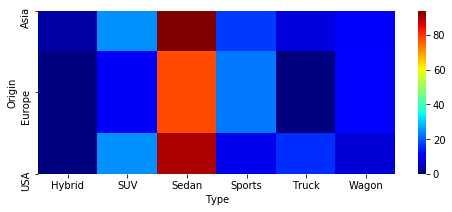

In [68]:
plt.figure(figsize=(8, 3))
sns.heatmap(pd.crosstab(df['Origin'], df['Type']), cmap="jet", annot=False, cbar=True)
plt.show()

__5__. Рассмотрим корреляцию между исходными признаками. Видим, сильную линейную статистическую связь между `MSRP` и `Invoice`.

In [70]:
df.iloc[:,:10].corr(method='spearman')

,MSRP,Invoice,EngineSize,Cylinders,Horsepower
MSRP,1.000000,0.999056,0.669441,0.729980,0.865952
Invoice,0.999056,1.000000,0.660996,0.722464,0.862583
EngineSize,0.669441,0.660996,1.000000,0.924031,0.807742
Cylinders,0.729980,0.722464,0.924031,1.000000,0.814596
Horsepower,0.865952,0.862583,0.807742,0.814596,1.000000


/Users/v.bugaevskii/miniconda3/envs/ml-py37/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


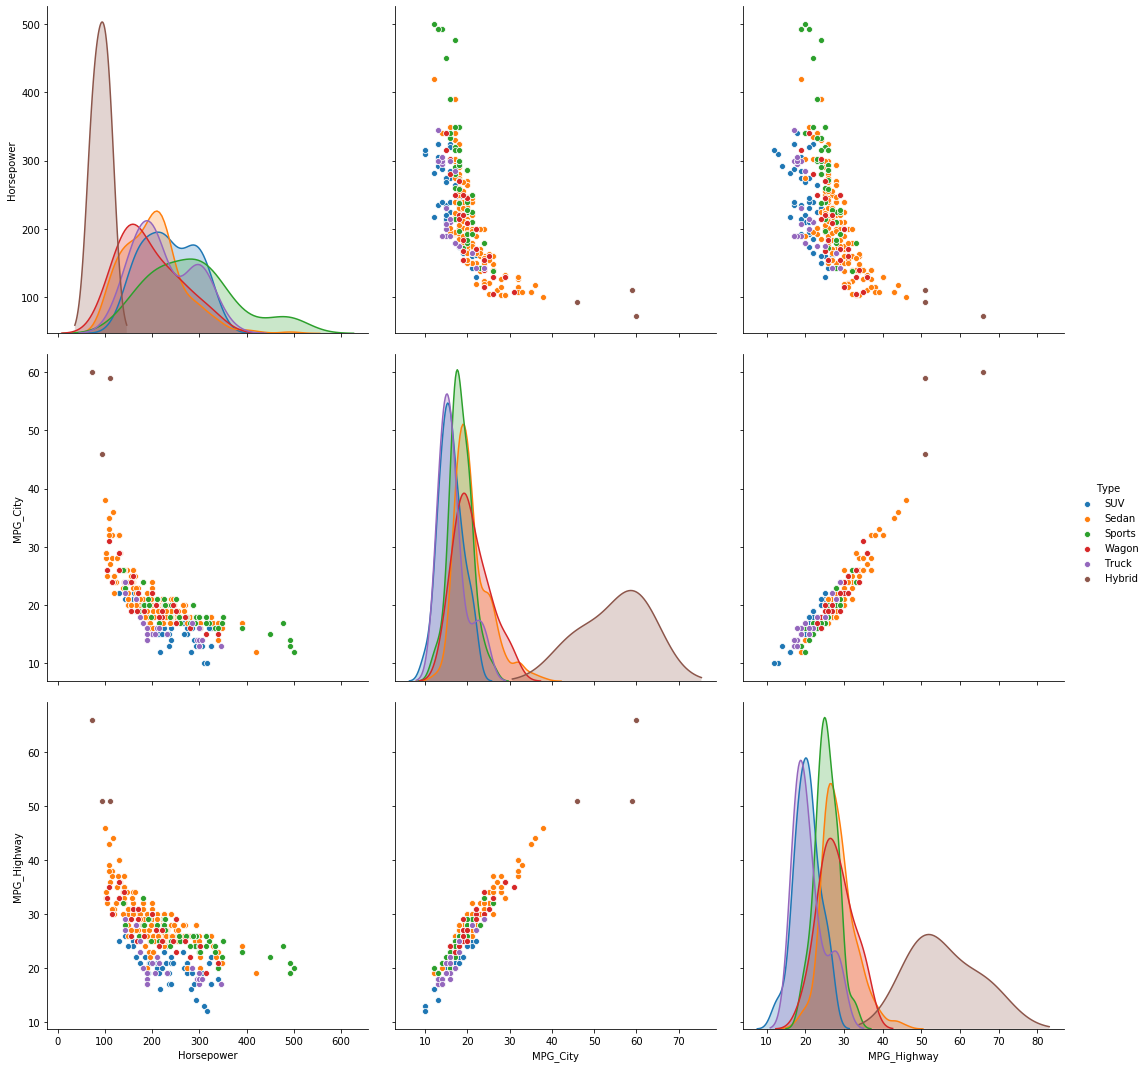

In [69]:
_ = sns.pairplot(vars=["Horsepower", "MPG_City", "MPG_Highway"], data=df, hue="Type", size=5)

__6__. В `pandas` есть поддержка работы с категориальными признаками. Выделим группу категориальных признаков.

Подробнее о возможностях работы с категориальными признаками:

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [71]:
df[['Make', 'Type', 'Origin', 'DriveTrain']] = \
    df[['Make', 'Type', 'Origin', 'DriveTrain']].astype('category')

<img src="files/encoding.png" width="800px">

label-кодирование – вариант кодирования, при котором каждому признаку сопоставляется его "порядковый" номер.

In [72]:
df['origin_label'] = df['Origin'].cat.codes

In [73]:
np.random.seed(9872)

df[['Origin', 'origin_label']].loc[np.random.randint(0, df.shape[0], 10)]

,Origin,origin_label
203,USA,2
345,USA,2
301,Asia,0
412,Europe,1
231,USA,2
201,USA,2
319,USA,2
336,Europe,1
97,USA,2
189,Europe,1


onehot-кодирование – вариант кодирования, при котором каждый признак представляет собой отдельное значение (отдельный столбец).

In [74]:
df_origin = pd.get_dummies(df['Origin'])
df_origin.columns = ['origin_' + c for c in df_origin.columns]
df_origin.head()

,origin_Asia,origin_Europe,origin_USA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [75]:
df_type = pd.get_dummies(df['Type'])
df_type.columns = ['type_' + c for c in df_type.columns]
df_type.head()

,type_Hybrid,type_SUV,type_Sedan,type_Sports,type_Truck,type_Wagon
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


**Подумайте**, как можно закодировать onehot-кодированием совместную пару признаков?

__7__. Метод `groupby`, пожалуй, один из самых распространенных и полезных методов `pd.DataFrame`. По своей логике полносстью совпадает с логикой `GROUP BY` в `SQL`, и используется для подсчета агрегированных статистик внутри групп.

Посчитаем среднюю длину автомобиля в группах вида `(страна производства; тип)`. Обратите внимание на вовзращаемый тип.

In [76]:
df.groupby(by=["Origin", "Type"])["Length"].mean()

Origin  Type  
Asia    Hybrid    168.333333
        SUV       184.840000
        Sedan     184.010638
        Sports    170.000000
        Truck     203.250000
        Wagon     176.909091
Europe  SUV       185.200000
        Sedan     183.666667
        Sports    173.260870
        Wagon     183.666667
USA     SUV       192.600000
        Sedan     193.311111
        Sports    179.555556
        Truck     209.937500
        Wagon     189.000000
Name: Length, dtype: float64

Если нам не подходит `pd.Series` с мультистрочным индексом, можно преобразовать его в соотвевующие колонки датафрейма.

In [77]:
df.groupby(by=["Origin", "Type"])["Length"].mean().reset_index()

,Origin,Type,Length
0,Asia,Hybrid,168.333333
1,Asia,SUV,184.840000
2,Asia,Sedan,184.010638
3,Asia,Sports,170.000000
4,Asia,Truck,203.250000
5,Asia,Wagon,176.909091
6,Europe,SUV,185.200000
7,Europe,Sedan,183.666667
8,Europe,Sports,173.260870
9,Europe,Wagon,183.666667


Можно считать группу статистик одновременно.

In [78]:
df.groupby(by=["Origin", "Type"])["Length"].agg([np.mean, np.std, np.max, np.min, 'count'])

mean        std  amax  amin  count
Origin Type                                            
Asia   Hybrid  168.333333  11.547005   175   155      3
       SUV     184.840000  11.447998   208   163     25
       Sedan   184.010638  10.450595   204   154     94
       Sports  170.000000   8.215838   179   153     17
       Truck   203.250000  14.655569   224   188      8
       Wagon   176.909091  11.175460   189   155     11
Europe SUV     185.200000   5.370702   195   175     10
       Sedan   183.666667  11.788908   204   143     78
       Sports  173.260870  10.884590   191   158     23
       Wagon   183.666667   6.065301   192   174     12
USA    SUV     192.600000  17.327723   227   150     25
       Sedan   193.311111  13.406056   221   153     90
       Sports  179.555556   8.457410   190   160      9
       Truck   209.937500  15.373001   238   188     16
       Wagon   189.000000  10.598742   199   172      7

Метод `groupby` возвращает итерируемый объект с парами `(ключ_группы, группа)`. Такое устройство `groupby` позволяет подсчитывать более сложные статистики.

<span style="color:blue;font-weight:bold">Задача 1.</span> Выведите топ-3 дорогих автомобилей ( `Invoice` ) каждого типа `Type`.

In [79]:
# put your code here

,Type,id,Invoice
0,Hybrid,373,18926
1,Hybrid,149,18451
2,Hybrid,150,17911
3,SUV,251,71540
4,SUV,215,65807
5,SUV,219,56455
6,Sedan,262,119600
7,Sedan,261,88324
8,Sedan,268,80939
9,Sports,334,173560


<span style="color:blue;font-weight:bold">Задача 2.</span> Выведите среднее число лошадиных сил для автомобилей, у которых число цилиндров больше 9, по каждой из стран производителей.

In [80]:
# put your code here

,Origin,Horsepower
0,Asia,NaN
1,Europe,468.666667
2,USA,405.000000


<span style="color:blue;font-weight:bold">Задача 3.</span> Выведите количество автомобилей, у которых длина автомобиля больше 90% автомобилей, производимых в этой стране.

In [81]:
# put your code here

,Count,Origin
0,14,Asia
1,13,Europe
2,13,USA


Мы же посчитаем среднюю длину автомобиля у производителя по его типу. А также среднюю стоимость автомобиля в стране производителя.

In [82]:
df_mean_length = df.groupby(by=["Type", "Make"])["Length"].mean().reset_index()
df_mean_length.head(10)

,Type,Make,Length
0,Hybrid,Honda,165.000000
1,Hybrid,Toyota,175.000000
2,SUV,Acura,189.000000
3,SUV,BMW,182.000000
4,SUV,Buick,190.000000
5,SUV,Cadillac,197.000000
6,SUV,Chevrolet,192.750000
7,SUV,Dodge,201.000000
8,SUV,Ford,199.000000
9,SUV,GMC,208.666667


In [83]:
df_invoice_mean = df.groupby("Origin")["Invoice"].mean().reset_index().\
    rename(columns={'Invoice': 'Invoice_mean'})
df_invoice_mean

,Origin,Invoice_mean
0,Asia,22602.177215
1,Europe,44395.081301
2,USA,25949.340136


Можно построить сводную таблицу по таблице `df_mean_length`.

In [84]:
df_mean_length.pivot(index='Type', columns='Make', values='Length')

Make,Acura,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,GMC,...,Pontiac,Porsche,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo
Type,,,,,,,,,,,,,,,,,,,,,
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0000,NaN,NaN
SUV,189.0,NaN,182.000000,190.000000,197.00,192.750000,NaN,201.000000,199.000000,208.666667,...,182.000,188.000000,NaN,181.000000,NaN,NaN,175.0,187.6000,187.000000,189.000000
Sedan,187.0,185.230769,183.538462,200.142857,201.25,187.066667,191.615385,191.000000,188.454545,190.000000,...,192.125,NaN,185.0,185.833333,154.0,182.333333,176.8,184.5625,178.363636,184.555556
Sports,174.0,167.000000,169.000000,NaN,178.00,180.000000,160.000000,176.000000,184.000000,NaN,...,190.000,173.333333,NaN,NaN,NaN,174.000000,NaN,162.0000,NaN,NaN
Truck,NaN,NaN,NaN,NaN,221.00,209.800000,NaN,206.666667,205.666667,213.000000,...,NaN,NaN,NaN,NaN,NaN,193.000000,NaN,209.0000,NaN,NaN
Wagon,NaN,185.500000,176.000000,NaN,NaN,188.000000,199.000000,NaN,188.000000,NaN,...,172.000,NaN,190.0,190.000000,155.0,181.000000,167.0,171.0000,180.666667,183.000000


__8__. В случае, если данные хранятся в разных таблицах, вам точно пригодится объединение таблиц (join-ы и конкатенация). У нас все данные хранятся в одной таблице, однако до этого мы построили несколько таблиц, которые мы хотели бы присоединить к исходной.

<img src="files/sql_joins.jpg" width="950px">

https://academy.vertabelo.com/blog/sql-joins/

Например, мы хотим для каждой записи об автомобиле мы хотим понять, насколько сильно она отличается от средней цены автомобиля в стране производителя. Для этого сначала нужно присоединить таблицу `df_invoice_mean` к таблице `df`. Для этого выполним `LEFT JOIN`.

In [85]:
df = pd.merge(df, df_invoice_mean, how='left', on='Origin')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_label,Invoice_mean
0,Acura,MDX,SUV,Asia,All,36945.0,33337,3.5,6.0,265,17,23,4451.0,106,189,0,22602.177215
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761,2.0,4.0,200,24,31,2778.0,101,172,0,22602.177215
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647,2.4,4.0,200,22,29,3230.0,105,183,0,22602.177215
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299,3.2,6.0,270,20,28,3575.0,108,186,0,22602.177215
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014,3.5,6.0,225,18,24,3880.0,115,197,0,22602.177215


In [86]:
df["Invoice_unbiased"] = df["Invoice"] - df["Invoice_mean"]
df["Invoice_unbiased_pct"] = df["Invoice_unbiased"] / df["Invoice_mean"]

df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_label,Invoice_mean,Invoice_unbiased,Invoice_unbiased_pct
0,Acura,MDX,SUV,Asia,All,36945.0,33337,3.5,6.0,265,17,23,4451.0,106,189,0,22602.177215,10734.822785,0.474946
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761,2.0,4.0,200,24,31,2778.0,101,172,0,22602.177215,-841.177215,-0.037217
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647,2.4,4.0,200,22,29,3230.0,105,183,0,22602.177215,2044.822785,0.090470
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299,3.2,6.0,270,20,28,3575.0,108,186,0,22602.177215,7696.822785,0.340535
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014,3.5,6.0,225,18,24,3880.0,115,197,0,22602.177215,16411.822785,0.726117


Объединим также таблицы с закодированными признаками: `Origin` и `Type`. 

In [87]:
df = pd.concat([df, df_origin, df_type], sort=False, axis=1)
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,...,Invoice_unbiased_pct,origin_Asia,origin_Europe,origin_USA,type_Hybrid,type_SUV,type_Sedan,type_Sports,type_Truck,type_Wagon
0,Acura,MDX,SUV,Asia,All,36945.0,33337,3.5,6.0,265,...,0.474946,1,0,0,0,1,0,0,0,0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761,2.0,4.0,200,...,-0.037217,1,0,0,0,0,1,0,0,0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647,2.4,4.0,200,...,0.090470,1,0,0,0,0,1,0,0,0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299,3.2,6.0,270,...,0.340535,1,0,0,0,0,1,0,0,0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014,3.5,6.0,225,...,0.726117,1,0,0,0,0,1,0,0,0


Для корректного отображения установим опции на максимальное количество столбцов в таблице и количестве точек после запятой для чисел с плавающей точкой.

In [88]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 3)

df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_label,Invoice_mean,Invoice_unbiased,Invoice_unbiased_pct,origin_Asia,origin_Europe,origin_USA,type_Hybrid,type_SUV,type_Sedan,type_Sports,type_Truck,type_Wagon
0,Acura,MDX,SUV,Asia,All,36945.0,33337,3.5,6.0,265,17,23,4451.0,106,189,0,22602.177,10734.823,0.475,1,0,0,0,1,0,0,0,0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761,2.0,4.0,200,24,31,2778.0,101,172,0,22602.177,-841.177,-0.037,1,0,0,0,0,1,0,0,0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647,2.4,4.0,200,22,29,3230.0,105,183,0,22602.177,2044.823,0.090,1,0,0,0,0,1,0,0,0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299,3.2,6.0,270,20,28,3575.0,108,186,0,22602.177,7696.823,0.341,1,0,0,0,0,1,0,0,0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014,3.5,6.0,225,18,24,3880.0,115,197,0,22602.177,16411.823,0.726,1,0,0,0,0,1,0,0,0


__9__. Предположим, что мы знаем некоторое правило, по которому автомобиль считается быстрым или медленным. Пусть правило будет, например, таким: если число лошадиных сил больше `u_bound`, то автомобиль считается быстрым, а если меньше `l_bound` – медленным. Тогда результат применения этого правила можно вычислить с помощью метода `apply` для `pd.Series`.

In [89]:
l_bound, u_bound = np.quantile(df["Horsepower"], [0.1, 0.9])

df["Horsepower"].apply(lambda x: "Fast" if x > u_bound else \
                                 "Slow" if x < l_bound else "Medium")[15:25]

15    Medium
16    Medium
17    Medium
18      Fast
19      Fast
20      Fast
21    Medium
22    Medium
23    Medium
24    Medium
Name: Horsepower, dtype: object

Поменяем правило – будем полагать дополнительно, что если автомобиль из класса спортивных, то он априори считается быстрым. Тогда результат правила можно вычислить с помощью метода `apply` для `pd.Series`. Обратите внимание на аргумент `axis=1`, который указывает, что функция вычисляется для каждой строки.

In [90]:
df.apply(lambda r: "Fast" if r["Horsepower"] > u_bound or r["Type"] == 'Sports' else \
                   "Slow" if r["Horsepower"] < l_bound else "Medium", axis=1)[15:25]

15    Medium
16    Medium
17    Medium
18      Fast
19      Fast
20      Fast
21      Fast
22      Fast
23      Fast
24    Medium
dtype: object

С помощью метода `apply` можно возвращать не только один столбец, но и несколько. Существует два принятых способа это сделать:
1. возвращать `pd.Series` из метода `apply`, сразу получив `pd.DataFrame`;
2. возвращать словарь из метода `apply`, а затем привести список словарей к `pd.DataFrame`.

Ниже приведена оценка работоспособности каждого из подходов. На основании этой оценки **рекомендуется** использовать второй способ.

Подробнее тут: https://ys-l.github.io/posts/2015/08/28/how-not-to-use-pandas-apply/

In [91]:
def func(row):
    # there should be some complex logic
    d = { 'ratio1' : row["Horsepower"]  / row["Weight"],
          'ratio2' : row["MPG_Highway"] / row["MPG_City"] }
    return pd.Series(d)

df.apply(func, axis=1).head(10)

,ratio1,ratio2
0,0.060,1.353
1,0.072,1.292
2,0.062,1.318
3,0.076,1.400
4,0.058,1.333
5,0.058,1.333
6,0.092,1.412
7,0.052,1.409
8,0.047,1.304
9,0.064,1.400


In [92]:
%%timeit

df.apply(func, axis=1)

155 ms ± 5.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
def func(row):
    # there should be some complex logic
    d = { 'ratio1' : row["Horsepower"]  / row["Weight"],
          'ratio2' : row["MPG_Highway"] / row["MPG_City"] }
    return d

In [94]:
%%timeit

pd.DataFrame(df.apply(func, axis=1))

46.8 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


__10__. У `pd.Series` есть метод `isin`, с помощью которого можно эффективно выбрать строки, удовлетворяющие условию. Пусть, мы хотим получить записи для всех тяжелых машин, т.е. типов `SUV`, `Wagon` и `Truck`.

In [95]:
df["Type"].unique()

[SUV, Sedan, Sports, Wagon, Truck, Hybrid]
Categories (6, object): [SUV, Sedan, Sports, Wagon, Truck, Hybrid]

In [96]:
df.loc[df["Type"].isin({'SUV', 'Wagon', 'Truck'})].head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_label,Invoice_mean,Invoice_unbiased,Invoice_unbiased_pct,origin_Asia,origin_Europe,origin_USA,type_Hybrid,type_SUV,type_Sedan,type_Sports,type_Truck,type_Wagon
0,Acura,MDX,SUV,Asia,All,36945.0,33337,3.5,6.0,265,17,23,4451.0,106,189,0,22602.177,10734.823,0.475,1,0,0,0,1,0,0,0,0
24,Audi,A6 3.0 Avant Quattro,Wagon,Europe,All,40840.0,37060,3.0,6.0,220,18,25,4035.0,109,192,1,44395.081,-7335.081,-0.165,0,1,0,0,0,0,0,0,1
25,Audi,S4 Avant Quattro,Wagon,Europe,All,49090.0,44446,4.2,8.0,340,15,21,3936.0,104,179,1,44395.081,50.919,0.001,0,1,0,0,0,0,0,0,1
26,BMW,X3 3.0i,SUV,Europe,All,37000.0,33873,3.0,6.0,225,16,23,4023.0,110,180,1,44395.081,-10522.081,-0.237,0,1,0,0,1,0,0,0,0
27,BMW,X5 4.4i,SUV,Europe,All,52195.0,47720,4.4,8.0,325,16,22,4824.0,111,184,1,44395.081,3324.919,0.075,0,1,0,0,1,0,0,0,0
45,BMW,325xi Sport,Wagon,Europe,All,32845.0,30110,2.5,6.0,184,19,26,3594.0,107,176,1,44395.081,-14285.081,-0.322,0,1,0,0,0,0,0,0,1
46,Buick,Rainier,SUV,USA,All,37895.0,34357,4.2,6.0,275,15,21,4600.0,113,193,2,25949.340,8407.660,0.324,0,0,1,0,1,0,0,0,0
47,Buick,Rendezvous CX,SUV,USA,Front,26545.0,24085,3.4,6.0,185,19,26,4024.0,112,187,2,25949.340,-1864.340,-0.072,0,0,1,0,1,0,0,0,0
55,Cadillac,Escalade,SUV,USA,Front,52795.0,48377,5.3,8.0,295,14,18,5367.0,116,199,2,25949.340,22427.660,0.864,0,0,1,0,1,0,0,0,0
56,Cadillac,SRX V8,SUV,USA,Front,46995.0,43523,4.6,8.0,320,16,21,4302.0,116,195,2,25949.340,17573.660,0.677,0,0,1,0,1,0,0,0,0


## Пример 2 (работа с пропусками)

__1__. Загружаем датасет. Датасет представляет собой информацию об упавших и наблюдаемых метеоритах.

https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

In [97]:
df = pd.read_csv('files/meteorite-landings.csv', sep=',')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.083,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.183,10.233,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,"(-33.166670, -64.950000)"


In [98]:
df.shape

(45716, 10)

Видим аномальные показатели:
* минимальная масса близкая к 0;
* максимальный год – 2501;
* `reclat` и `reclong` – близкие к 0.

In [99]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000,4.558e+04,45428.000,38401.000,38401.000
mean,26889.735,1.328e+04,1991.772,-39.123,61.074
std,16860.683,5.750e+05,27.181,46.379,80.647
min,1.000,0.000e+00,301.000,-87.367,-165.433
25%,12688.750,7.200e+00,1987.000,-76.714,0.000
50%,24261.500,3.260e+01,1998.000,-71.500,35.667
75%,40656.750,2.026e+02,2003.000,0.000,157.167
max,57458.000,6.000e+07,2501.000,81.167,354.473


In [100]:
df.nlargest(5, 'year')

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
38188,Ur,24125,Valid,Iron,NaN,Found,2501.0,30.900,46.017,"(30.900000, 46.016670)"
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.000,0.000,"(0.000000, 0.000000)"
194,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013.0,54.817,61.117,"(54.816670, 61.116670)"
30727,Northwest Africa 7755,57166,Valid,Martian (shergottite),30.0,Found,2013.0,0.000,0.000,"(0.000000, 0.000000)"
30759,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,2013.0,0.000,0.000,"(0.000000, 0.000000)"


Убеждаемся в аномальных записях по году.

__2__. Подготовим датасет для дальнейшей работы.

Установим правильных построчный индекс.

In [101]:
df.set_index('id', drop=True, inplace=True)

Удалим лишнюю колонку.

In [102]:
df.drop(columns=['GeoLocation'], inplace=True)

Переименуем столбцы в более короткие названия.

In [103]:
df.rename(columns={'reclat': 'lat', 'reclong': 'lon', 'recclass': 'class'}, inplace=True)

Установим пропущенные значения для аномальных показателей.

In [104]:
df.loc[df['year'] > 2013, 'year'] = np.nan
df.loc[np.isclose(df['mass'], 0), 'mass'] = np.nan

mask = np.isclose(df[['lat', 'lon']], 0).any(axis=1)
df.loc[mask, ['lat', 'lon']] = np.nan

Оставим лишь записи только для тех метеоритов, для которых мы точно знаем упали ли они, и когда они упали.

In [105]:
df.dropna(subset=['fall', 'year'], inplace=True)

Помотрим, что получилось.

In [106]:
df.head()

,name,nametype,class,mass,fall,year,lat,lon
id,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.775,6.083
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.183,10.233
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900
370,Achiras,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950


In [107]:
df.shape

(45426, 8)

__3__. Создадим столбец `has_fallen`, который бинаризует столбец `fall`.

In [108]:
df['has_fallen'] = df['fall'].map({'Fell': 1, 'Found': 0})
df.head()

,name,nametype,class,mass,fall,year,lat,lon,has_fallen
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.775,6.083,1
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.183,10.233,1
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.217,-113.000,1
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.883,-99.900,1
370,Achiras,Valid,L6,780.0,Fell,1902.0,-33.167,-64.950,1


__4__. Заполненим теперь пропущенные данные. Посмотрим, какие колонки вообще имеют пропуски, и какова доля пропусков.

In [109]:
df.isna().any(axis=0)

name          False
nametype      False
class         False
mass           True
fall          False
year          False
lat            True
lon            True
has_fallen    False
dtype: bool

In [110]:
df.isna().sum(axis=0) / df.shape[0]

name          0.000
nametype      0.000
class         0.000
mass          0.003
fall          0.000
year          0.000
lat           0.300
lon           0.300
has_fallen    0.000
dtype: float64

Видим, что доля пропусков для признака `mass` не велика – менее 0.3%, поэтому заполним пропуски средним значением в столбце. Убедимся, что пропущенных значений для этого признака больше нет.

In [111]:
df.loc[:, 'mass'].fillna(df['mass'].mean(), inplace=True)

In [112]:
df.isna().any(axis=0)

name          False
nametype      False
class         False
mass          False
fall          False
year          False
lat            True
lon            True
has_fallen    False
dtype: bool